In [175]:
#Importing Data Manipulation Libraries
import numpy as np
import pandas as pd

#Importing Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Warnings
import warnings 
warnings.filterwarnings('ignore')

#Importing Scikit-Learn Library
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split;

#Importing Metrics for Regression Model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import confusion_matrix,accuracy_score

#Importing Logging
import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    filemode='w',
                    filename='model.log',force=True)



In [176]:
# Import Dataset using pandas Function
customer_data =  pd.read_csv('customer_data.csv')
payment_data =  pd.read_csv('payment_data.csv')

In [177]:
# Checking Information about Dataset
payment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 773.6+ KB


In [178]:
# Checking Information about Dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [179]:
# Merging Two Dataset  : Data
data = payment_data.merge(customer_data,how = 'left')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
 12  label            8250 non-null   int64  
 13  fea_1            8250 non-null   int64  
 14  fea_2            7222 non-null   float64
 15  fea_3            8250 non-null   int64  
 16  fea_4            8250 non-null   float64
 17  fea_5         

In [180]:
df = (data)
df.sample(frac = 1)

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,...,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
8029,58985806,0,0,0,0,29,10,NaN,12/12/2003,33400.8,...,1326.5,3,133000.0,2,15,5,110,5,71000,1.000000
7924,54984182,0,0,0,0,0,5,NaN,21/11/2004,0.0,...,1281.5,3,144000.0,2,15,5,68,1,60057,1.000000
255,54992408,0,0,0,0,4,10,NaN,14/02/2016,-38.4,...,1314.5,1,53000.0,2,8,5,103,5,151300,187.539329
849,58984702,0,0,0,0,2,10,193600.0,13/09/2015,10698.0,...,1310.0,3,325000.0,2,15,5,83,3,71000,1.000000
3968,58988853,0,0,0,0,15,10,NaN,12/08/2013,10400.4,...,1290.5,3,116000.0,1,11,5,109,4,60062,196.494275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,54985410,0,0,0,0,4,10,NaN,06/02/2015,11569.2,...,1304.0,3,290000.0,2,11,5,111,4,60000,310.383634
5416,54985214,0,0,0,0,4,10,29700.0,28/08/2011,6458.4,...,1349.0,1,193000.0,2,11,5,100,5,350063,316.227766
7659,58992325,0,0,0,0,26,10,NaN,13/01/2006,0.0,...,1263.5,3,148000.0,2,11,5,90,5,60017,1.000000
4976,58998578,0,0,0,0,14,24,NaN,17/06/2012,0.0,...,1191.5,3,50000.0,2,8,5,106,5,60090,1.000000


<Axes: >

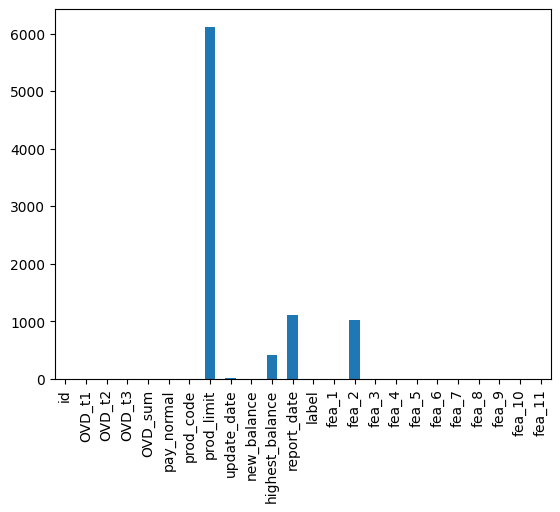

In [181]:
df.isna().sum().plot(kind='bar')

In [182]:
#checking null values per column
(df.isnull().sum()/len(df))*100

id                  0.000000
OVD_t1              0.000000
OVD_t2              0.000000
OVD_t3              0.000000
OVD_sum             0.000000
pay_normal          0.000000
prod_code           0.000000
prod_limit         74.157576
update_date         0.315152
new_balance         0.000000
highest_balance     4.957576
report_date        13.503030
label               0.000000
fea_1               0.000000
fea_2              12.460606
fea_3               0.000000
fea_4               0.000000
fea_5               0.000000
fea_6               0.000000
fea_7               0.000000
fea_8               0.000000
fea_9               0.000000
fea_10              0.000000
fea_11              0.000000
dtype: float64

In [183]:
#Dropping the columns grater than 15% of missing values from the datafram

df.drop(columns=['prod_limit'],inplace = True)


In [184]:
df.drop(columns=['update_date'],inplace = True)
df.drop(columns=['report_date'],inplace = True)

In [185]:
#draging the target column at the end of the Dataframe
target_col = 'label'
cols = [col for col in df.columns 
        if col != target_col] + [target_col]
df = df[cols]

In [186]:
df

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,new_balance,highest_balance,fea_1,...,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11,label
0,58987402,0,0,0,0,1,10,0.0,NaN,5,...,3,62000.0,2,15,9,95,4,60023,1.000000,0
1,58995151,0,0,0,0,1,5,588720.0,491100.0,7,...,2,126000.0,2,11,9,115,4,450028,224.267697,1
2,58997200,0,0,0,0,2,5,840000.0,700500.0,7,...,1,150000.0,2,11,-1,110,4,60000,219.248717,0
3,54988608,0,0,0,0,3,10,8425.2,7520.0,7,...,3,60000.0,2,11,9,108,4,151300,158.113883,0
4,54987763,0,0,0,0,2,10,15147.6,NaN,7,...,1,96000.0,2,11,9,88,5,151300,233.520877,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,58995478,0,0,0,0,9,15,0.0,NaN,7,...,1,77000.0,2,11,5,95,3,450000,173.205081,0
8246,54992408,0,0,0,0,1,2,0.0,NaN,4,...,1,53000.0,2,8,5,103,5,151300,187.539329,0
8247,54988209,0,0,0,0,5,13,20654.4,33315.0,7,...,3,93000.0,1,11,3,104,3,60032,200.000000,0
8248,54992408,0,0,0,0,1,2,0.0,NaN,4,...,1,53000.0,2,8,5,103,5,151300,187.539329,0


In [187]:
#Discriptive stats
from collections import OrderedDict
stats=[]

for i in numerical_col.columns:
    numerical_stats=OrderedDict({
    'Feature':i,
        'Mean':df[i].mean(),
        'Medain':df[i].median(),
        'Mode':df[i].mode()[0],
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skewness':df[i].skew(),  
        'Kurtosis':df[i].kurt(),
        'Max':df[i].max(),
        'Min':df[i].min(),
        'Variance':df[i].var()
    })
    stats.append(numerical_stats)
    report=pd.DataFrame(stats)
report

,Feature,Mean,Medain,Mode,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis,Max,Min,Variance
0,id,5.782173e+07,5.898905e+07,58988212.0,54990497.0,5.899655e+07,4.006054e+06,1.822724e+06,-0.912485,-1.167606,5.900624e+07,54982353.0,3.322323e+12
1,OVD_t1,2.490909e-01,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,1.250197e+00,11.350079,203.502050,3.400000e+01,0.0,1.562992e+00
2,OVD_t2,1.271515e-01,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,8.600464e-01,15.318031,406.087769,3.400000e+01,0.0,7.396797e-01
3,OVD_t3,3.692121e-01,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,2.900320e+00,9.644601,99.087751,3.500000e+01,0.0,8.411854e+00
4,OVD_sum,1.876817e+02,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,1.804233e+03,13.091835,185.918017,3.150000e+04,0.0,3.255255e+06
5,pay_normal,1.452667e+01,1.100000e+01,1.0,4.0,2.500000e+01,2.100000e+01,1.205363e+01,0.558395,-1.076180,3.600000e+01,0.0,1.452899e+02
6,prod_code,8.232000e+00,1.000000e+01,10.0,6.0,1.000000e+01,4.000000e+00,3.533055e+00,0.036071,2.472783,2.700000e+01,0.0,1.248248e+01
7,new_balance,1.054042e+05,0.000000e+00,0.0,0.0,2.494800e+04,2.494800e+04,1.887704e+06,79.077382,6770.874616,1.632120e+08,-40303.2,3.563427e+12
8,highest_balance,2.192027e+05,4.404700e+04,100500.0,23453.0,1.005000e+05,7.704700e+04,2.814536e+06,47.718634,2599.792903,1.800005e+08,501.0,7.921615e+12
9,label,1.681212e-01,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,3.739966e-01,1.775200,1.151613,1.000000e+00,0.0,1.398734e-01


In [188]:
from sklearn.impute import SimpleImputer

for i in numerical_col.columns:
    sc = SimpleImputer(strategy='median')
    df[i] = sc.fit_transform(df[[i]])

<Axes: >

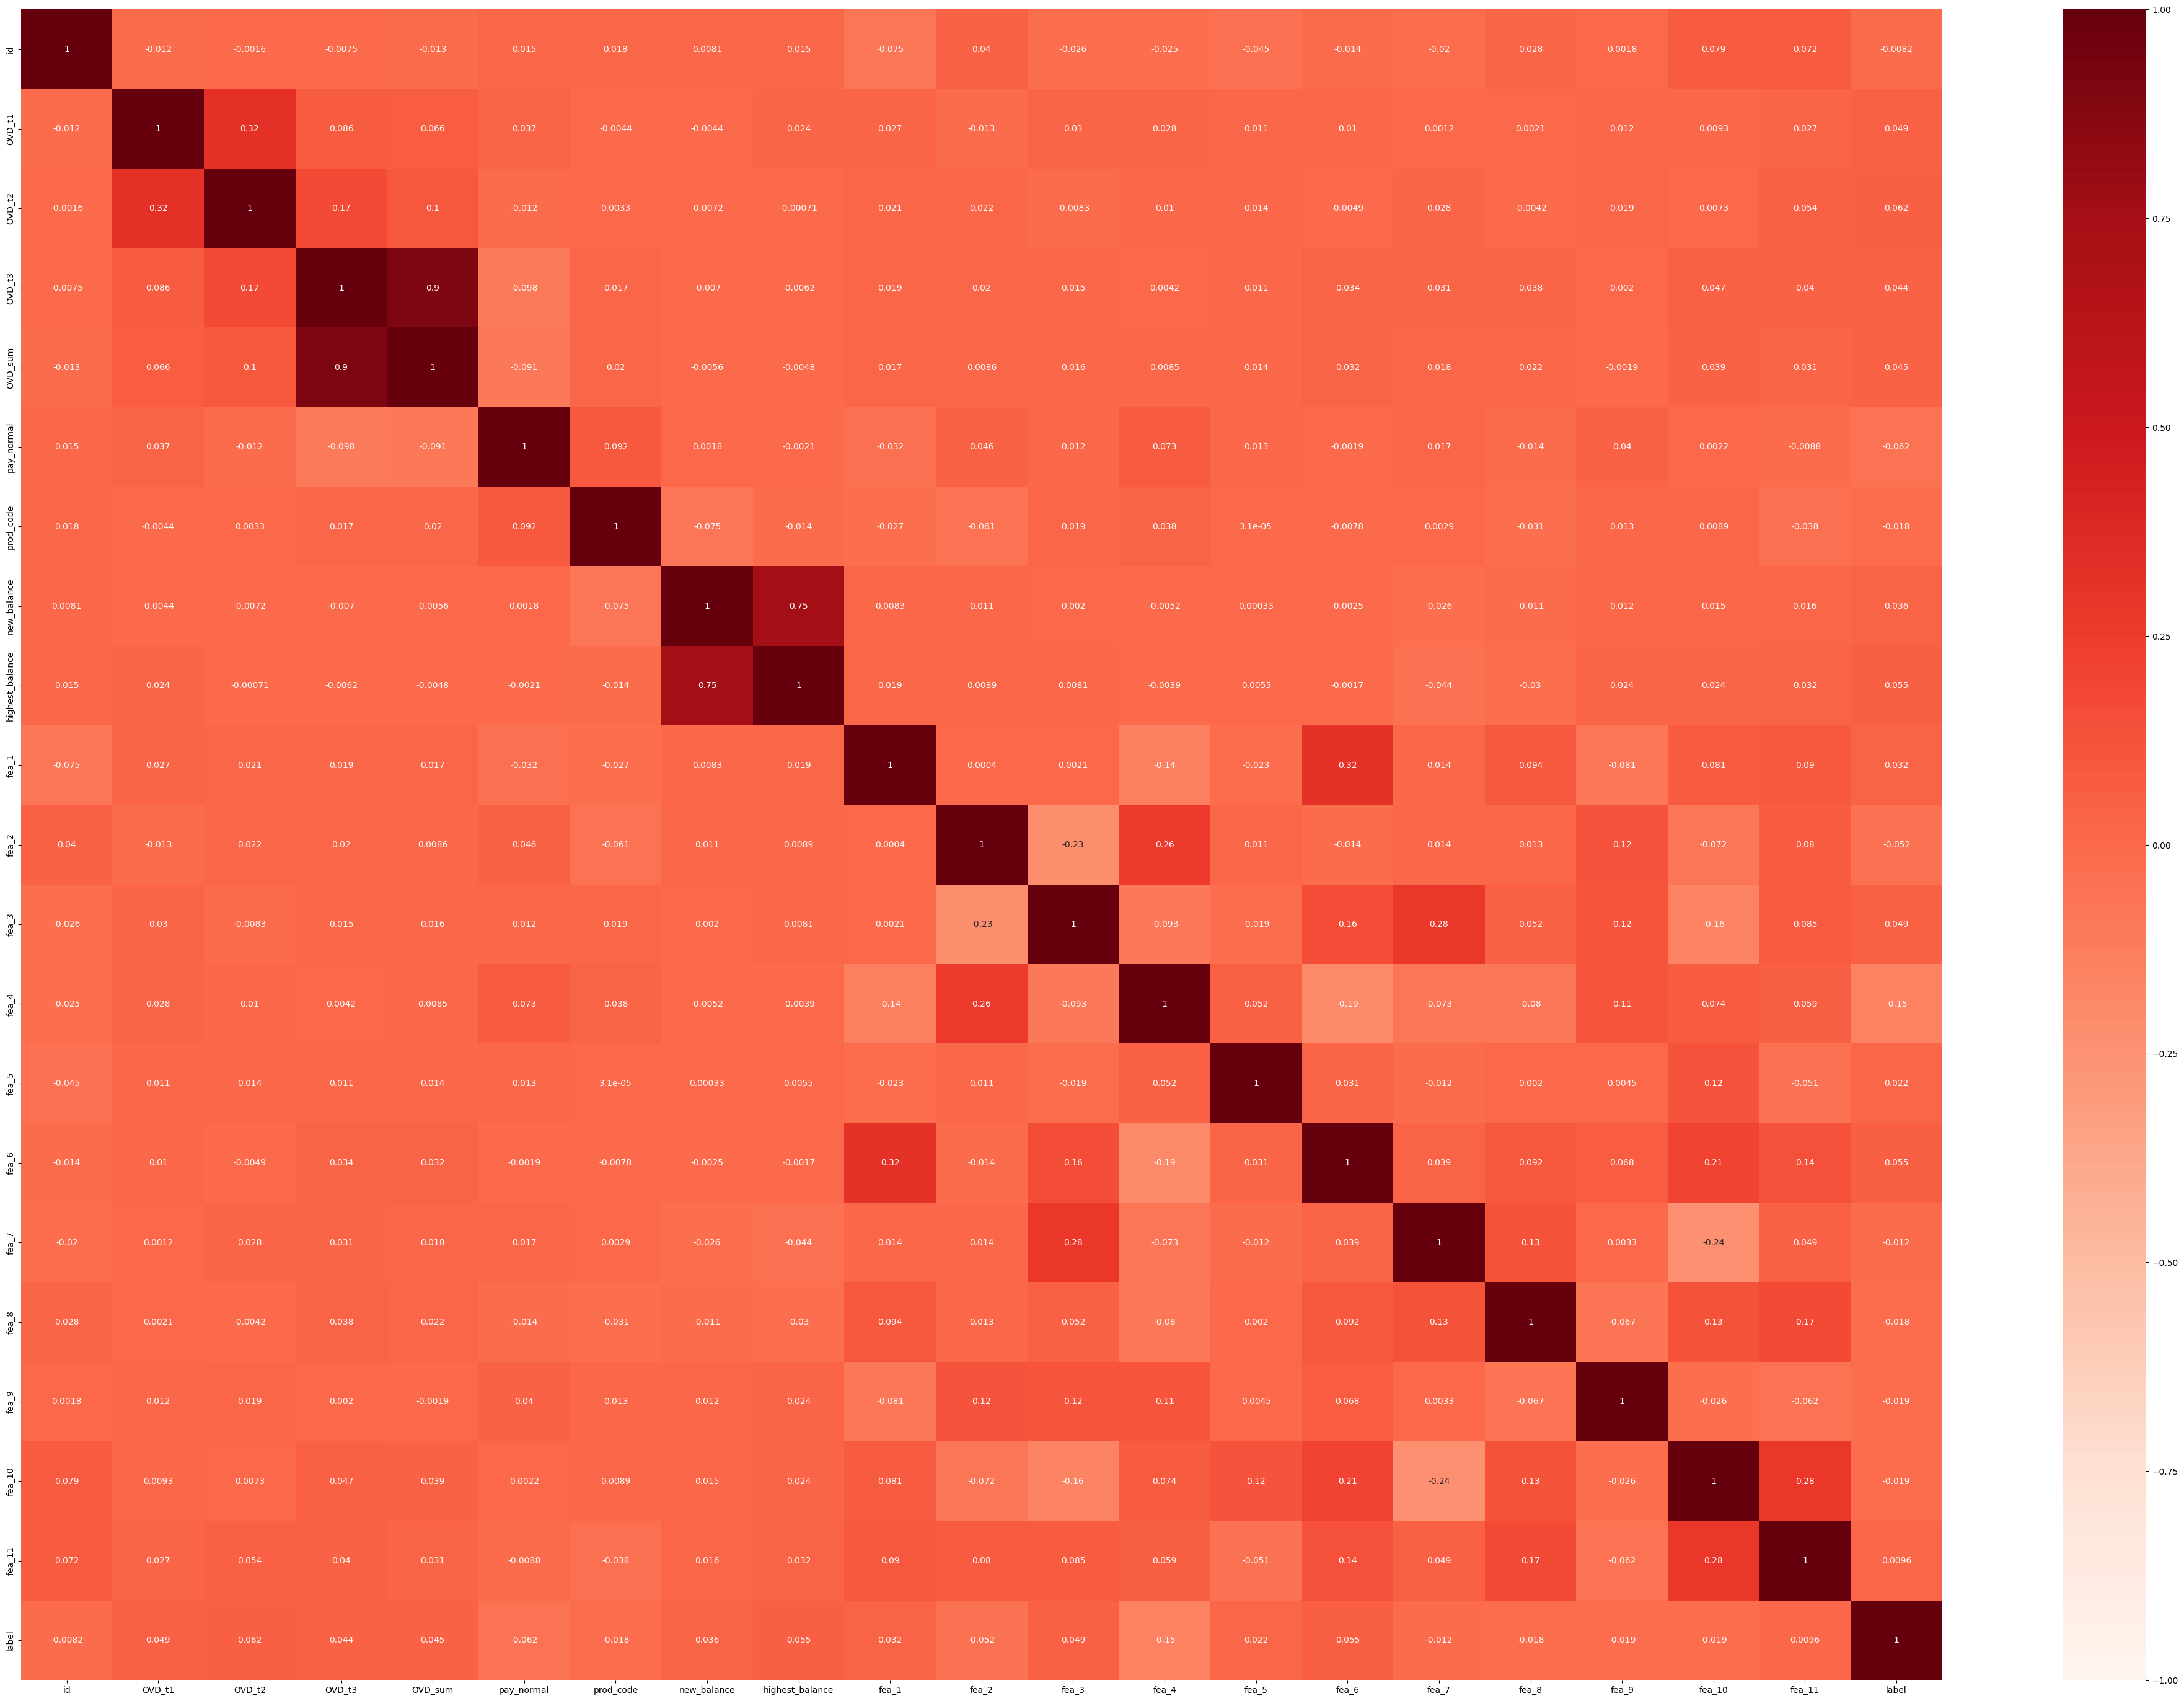

In [189]:
plt.figure(figsize=(50,35))
sns.heatmap(df.corr(), annot= True, vmax=1,vmin=-1,center=0,cmap='Reds')

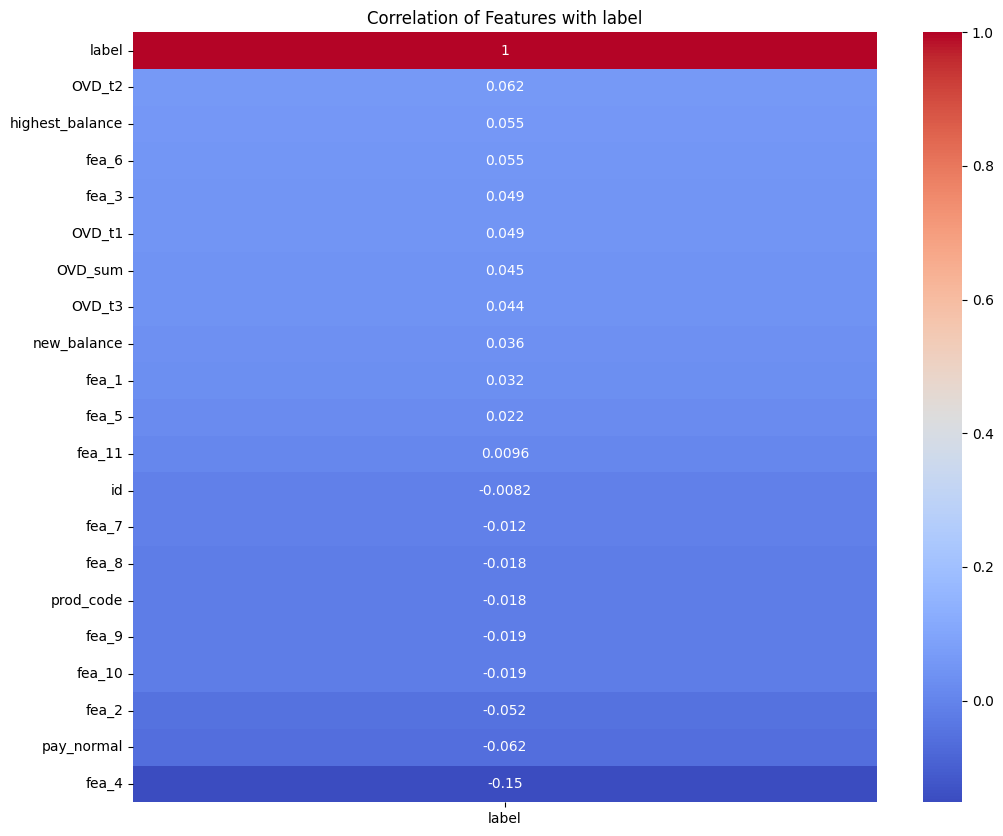

In [190]:
corr_matrix = df.corr(numeric_only=True)


# Sort correlation of all features with the target column
target = 'label'
sorted_corr = corr_matrix[target].sort_values(ascending=False)

# Plot the top correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[[target]].sort_values(by=target, ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with label")
plt.show()

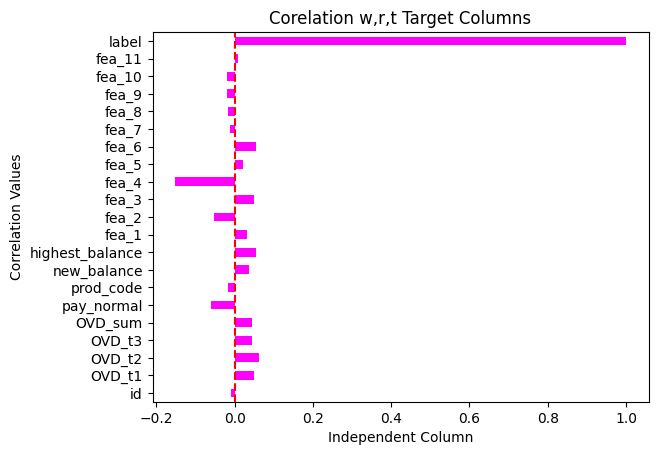

In [202]:
df.corr()['label'].plot(kind ='barh',cmap= 'spring')
plt.axvline(0,linestyle = '--' ,color = 'red')
plt.title('Corelation w,r,t Target Columns')
plt.ylabel('Correlation Values')
plt.xlabel('Independent Column')
plt.show()

In [191]:
X = df.drop(columns = ['label'],axis = 1)
y = df['label']

In [192]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state= 42)

In [194]:
y_train.value_counts()

label
0.0    4795
1.0     980
Name: count, dtype: int64

In [195]:
from imblearn.over_sampling import SMOTE,SMOTEN,ADASYN
os=SMOTE(random_state=42)
X_train,y_train=os.fit_resample(X_train,y_train)
y_train.value_counts()

label
0.0    4795
1.0    4795
Name: count, dtype: int64

In [196]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

RF = RandomForestClassifier().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)
print('The Model Accuracy for the Random Forest Classifier: ',accuracy_score(y_test,y_pred_RF)*100)

The Model Accuracy for the Random Forest Classifier:  96.4040404040404


In [198]:
import xgboost as xg

xgb = xg.XGBClassifier(random_state = 42).fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print('Model Accuracy for XGBoost classier: ',accuracy_score(y_test,y_pred_xgb)*100)

Model Accuracy for XGBoost classier:  98.22222222222223


In [199]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Define the model
xgb = XGBClassifier()

# Define hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3, 0.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.5, 1, 1.5]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)
# Fit to training data
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Params:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Predict and evaluate
y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

Best Params: {'subsample': 0.6, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best Score: 0.9630865484880082
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2068
         1.0       0.98      0.91      0.95       407

    accuracy                           0.98      2475
   macro avg       0.98      0.96      0.97      2475
weighted avg       0.98      0.98      0.98      2475



In [200]:
from catboost import CatBoostClassifier
CB=CatBoostClassifier().fit(X_train,y_train)
y_pred_CB=CB.predict(X_test)
print('The model accuracy for this model:',accuracy_score(y_test,y_pred_CB)*100)

Learning rate set to 0.02705
0:	learn: 0.6811565	total: 33.3ms	remaining: 33.2s
1:	learn: 0.6701805	total: 49.7ms	remaining: 24.8s
2:	learn: 0.6586412	total: 62ms	remaining: 20.6s
3:	learn: 0.6477664	total: 74ms	remaining: 18.4s
4:	learn: 0.6388648	total: 91.4ms	remaining: 18.2s
5:	learn: 0.6309840	total: 105ms	remaining: 17.4s
6:	learn: 0.6231493	total: 127ms	remaining: 18s
7:	learn: 0.6133849	total: 138ms	remaining: 17.1s
8:	learn: 0.6053103	total: 159ms	remaining: 17.5s
9:	learn: 0.5985957	total: 168ms	remaining: 16.6s
10:	learn: 0.5921477	total: 195ms	remaining: 17.5s
11:	learn: 0.5842500	total: 223ms	remaining: 18.4s
12:	learn: 0.5776396	total: 239ms	remaining: 18.1s
13:	learn: 0.5694868	total: 250ms	remaining: 17.6s
14:	learn: 0.5639375	total: 266ms	remaining: 17.5s
15:	learn: 0.5553695	total: 292ms	remaining: 18s
16:	learn: 0.5478639	total: 330ms	remaining: 19.1s
17:	learn: 0.5421651	total: 352ms	remaining: 19.2s
18:	learn: 0.5376267	total: 363ms	remaining: 18.8s
19:	learn: 0.53

In [201]:
RF.feature_importances_

array([0.0801748 , 0.02962183, 0.00446841, 0.00308183, 0.02919429,
       0.03550226, 0.04838335, 0.02878722, 0.03305021, 0.04691908,
       0.06764062, 0.04632009, 0.14594117, 0.00997942, 0.05485803,
       0.04589427, 0.07851681, 0.05684052, 0.07935247, 0.0754733 ])